In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings(action="ignore")

In [3]:
df = pd.read_csv(r"C:\Users\burug\InnomaticsRL\Machine_Learning\Practicles\Customer_Churn_Prediction\Telco-Customer-Churn.csv")

In [4]:
df.shape

(7043, 21)

In [5]:
df = df.drop(columns=["customerID"])

In [6]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"] , errors="coerce")
df["SeniorCitizen"] = df["SeniorCitizen"].astype("category")

In [9]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [10]:
categorical_columns = df.select_dtypes(include=["object","category"]).columns.to_list()
unique_values_df = pd.DataFrame({
    'Column': categorical_columns,
    'Unique Values Count': [df[col].nunique() for col in categorical_columns]
})
unique_values_df

,Column,Unique Values Count
0,gender,2
1,SeniorCitizen,2
2,Partner,2
3,Dependents,2
4,PhoneService,2
5,MultipleLines,3
6,InternetService,3
7,OnlineSecurity,3
8,OnlineBackup,3
9,DeviceProtection,3


<Figure size 1000x1000 with 0 Axes>

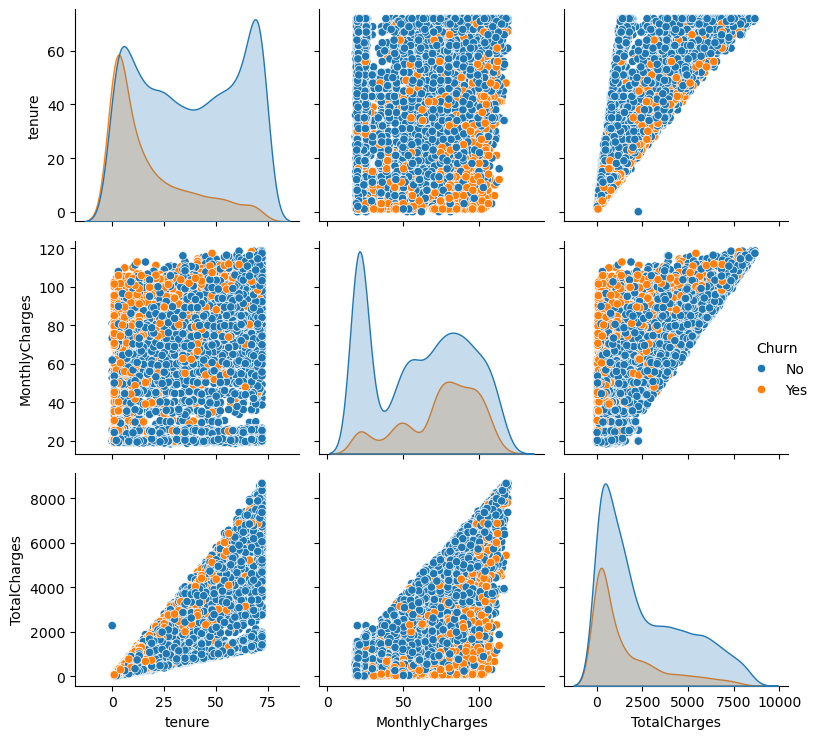

In [11]:
plt.figure(figsize=(10,10))
sns.pairplot(df,diag_kind="kde",hue = "Churn")
plt.tight_layout()
plt.show()

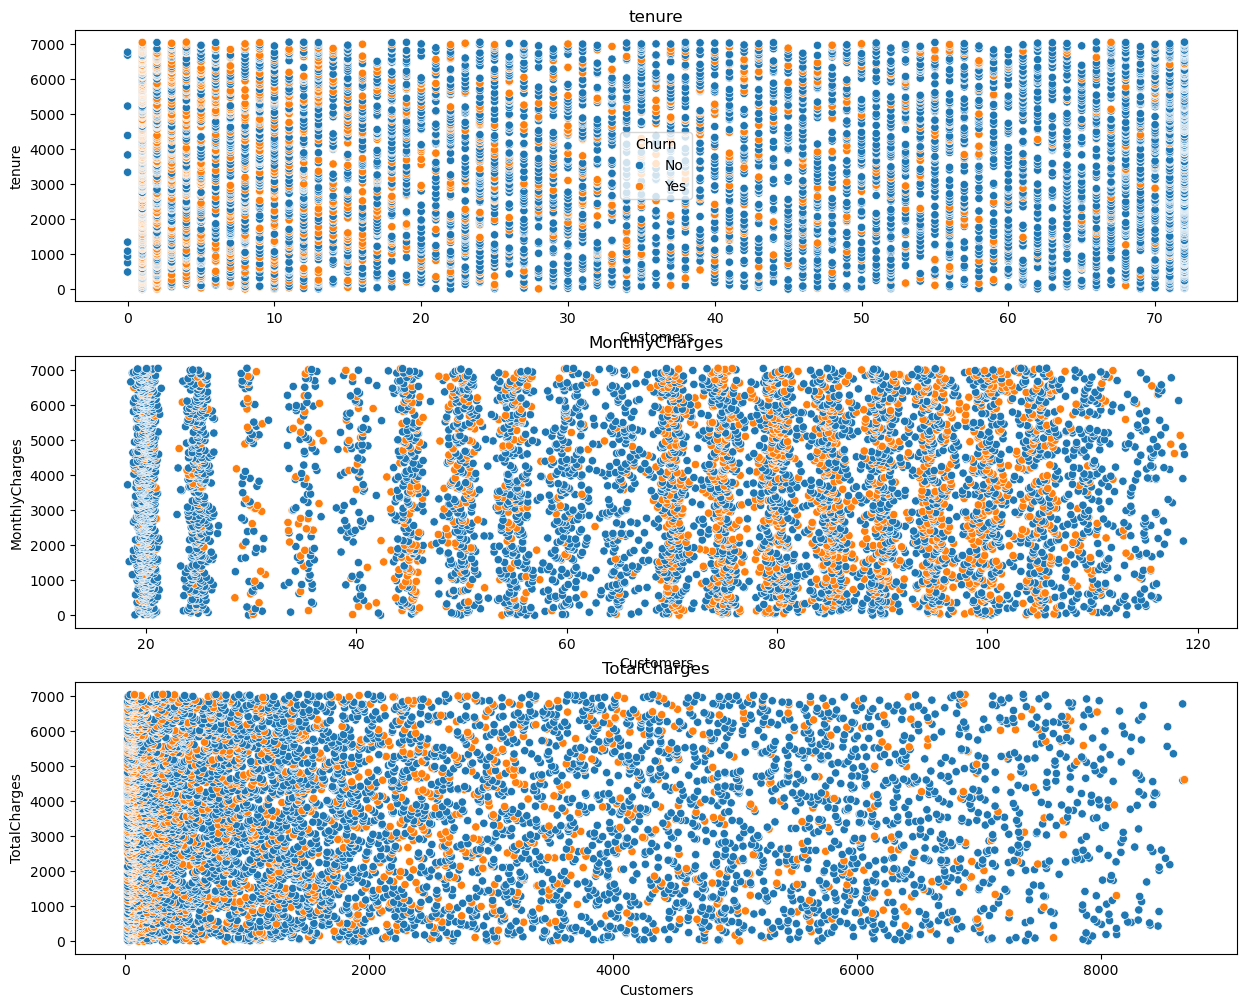

In [12]:
fig , ax = plt.subplots(3,1,figsize = (15,12))
cols = ["tenure","MonthlyCharges","TotalCharges"]
for i,col in enumerate(cols):
    sns.scatterplot(y = df.index,
                    x = df[col],
                    hue=df["Churn"],
                    ax = ax[i],
                    palette="tab10",
                    legend=(i == 0) )
    ax[i].set_title(col)
    ax[i].set_xlabel("Customers")
    ax[i].set_ylabel(col)
plt.show()

In [13]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

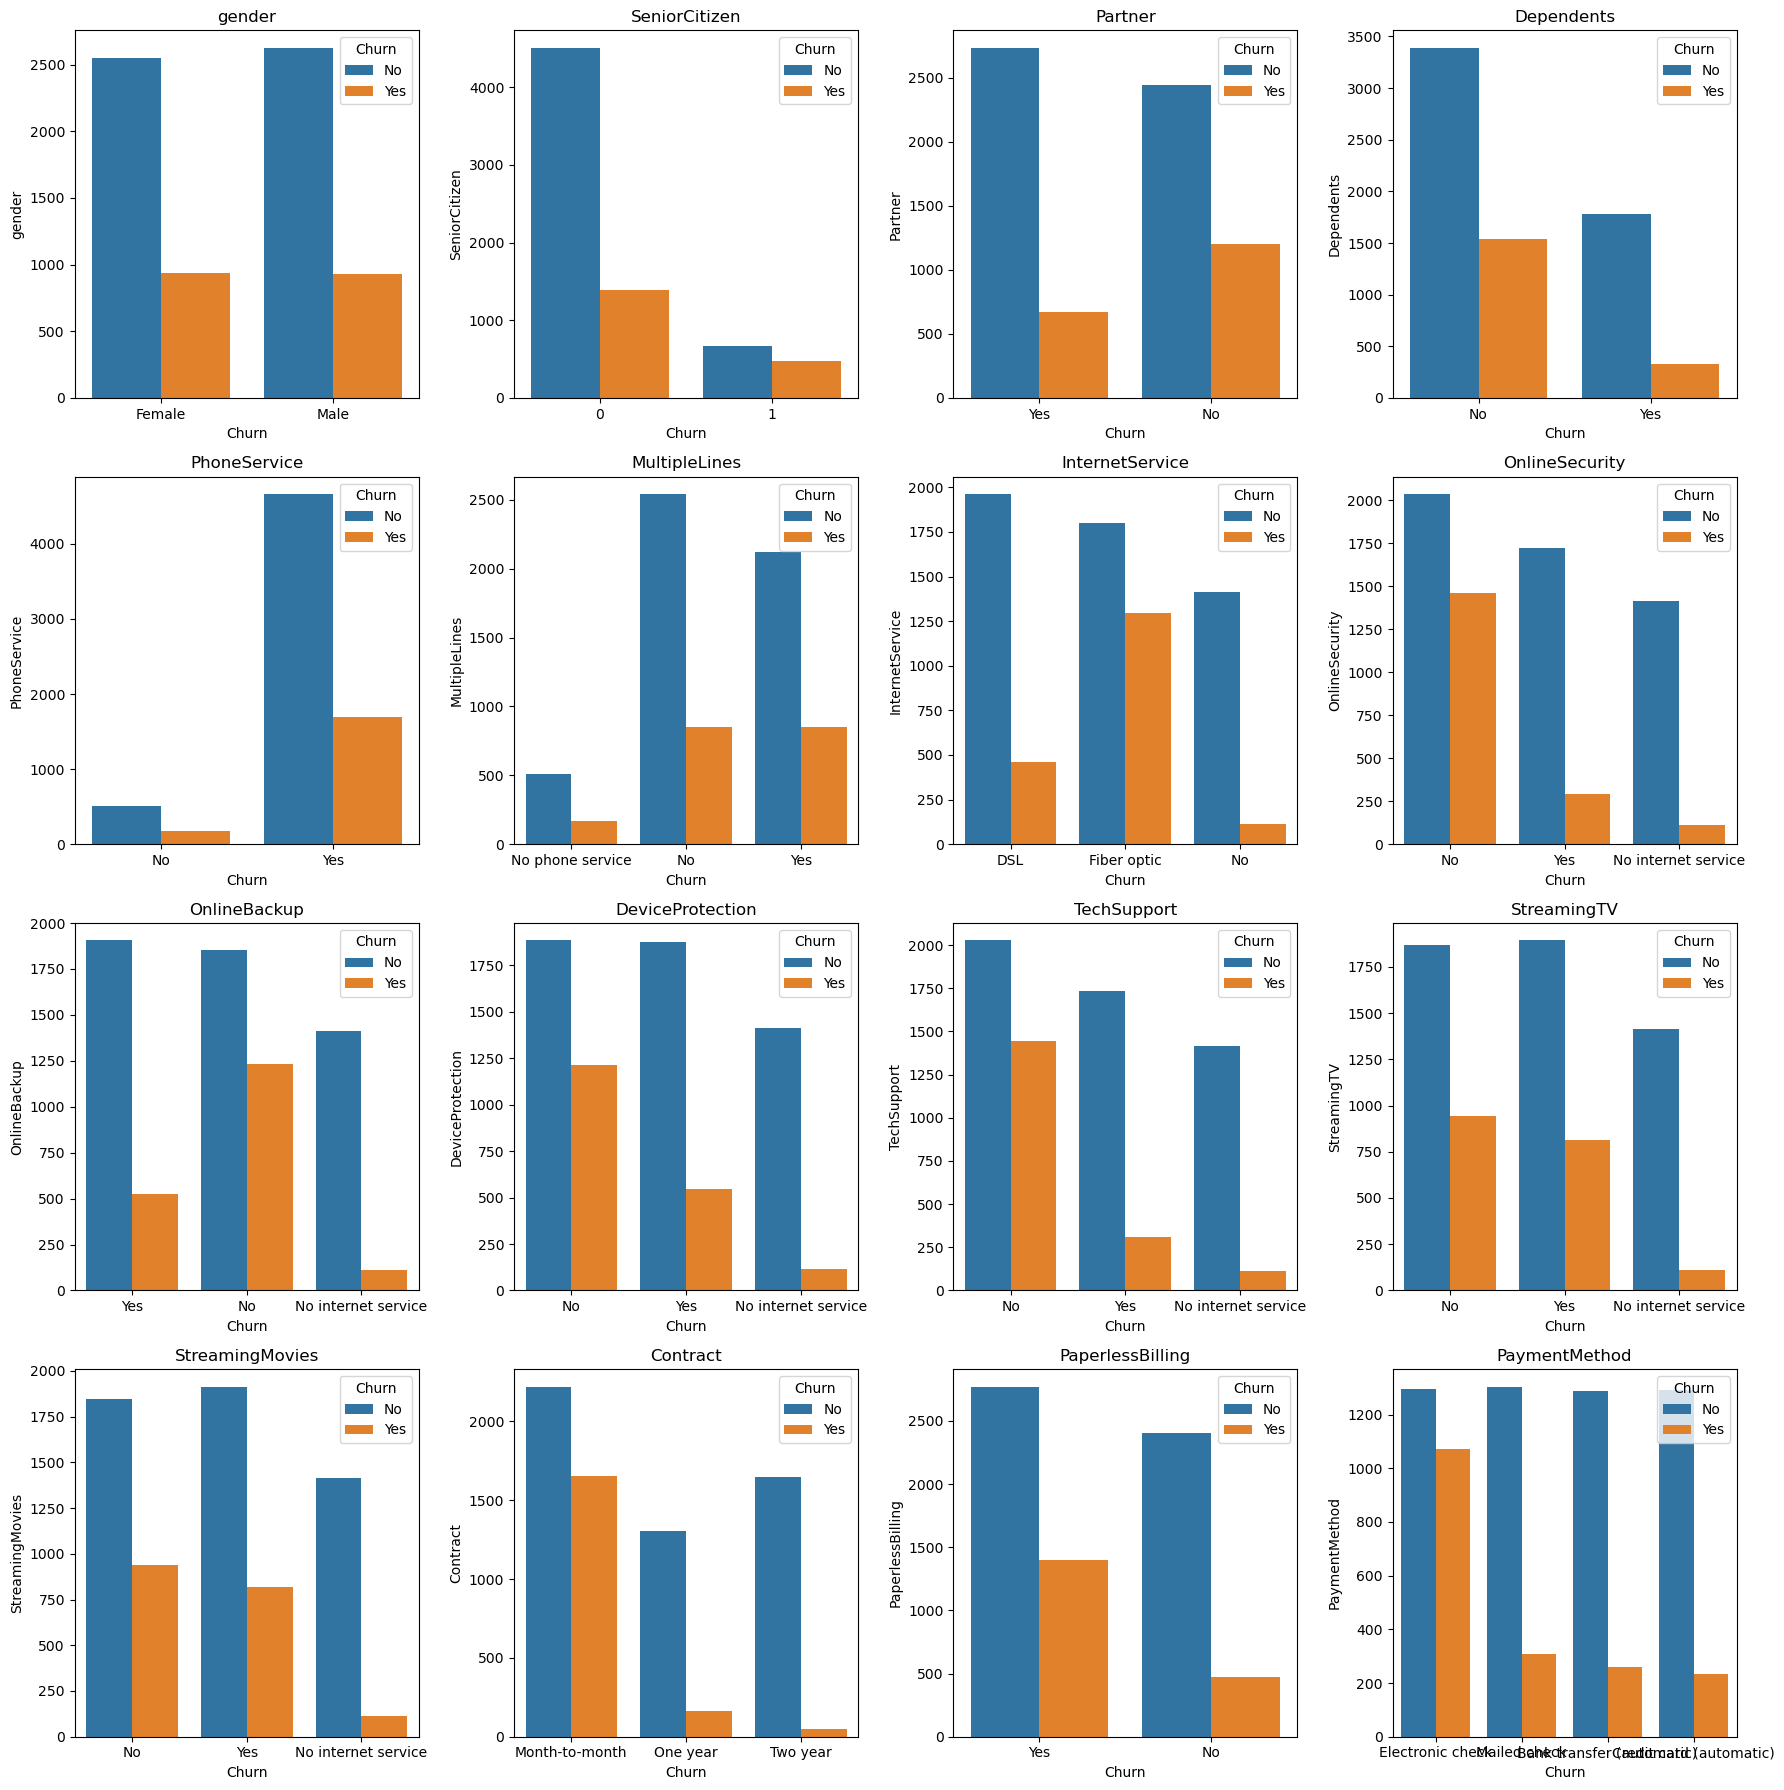

In [14]:
categorical_columns_features = categorical_columns[:-1]
fig , ax = plt.subplots(4,4,figsize = (18,18))
ax = ax.ravel()
for i,col in enumerate(categorical_columns_features):
    sns.countplot(    x=df[col],
                    hue=df.Churn,
                    ax = ax[i], )
    ax[i].set_title(col)
    ax[i].set_xlabel("Churn")
    ax[i].set_ylabel(col)
plt.tight_layout()
plt.show()

In [15]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [17]:
x = df.drop(columns=["Churn"])
y = df["Churn"]

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42,stratify=df["Churn"])

In [19]:
num_cols = ["tenure","MonthlyCharges","TotalCharges"]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().set_output(transform="pandas")
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [20]:
x_train.shape,x_test.shape

((5282, 19), (1761, 19))

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

In [22]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000,random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100,random_state=42),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [30]:
results = {}
for name, model in models.items():
    print(f"\n===== {name} =====")
    
    # Train
    model.fit(x_train, y_train)
    
    # Predicting
    y_train_pred = model.predict(x_train)
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]
    results[name] = accuracy_score(y_test, y_pred)
    
    # Evaluation
    print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print("Test ROC Accuracy:", roc_auc_score(y_test, y_proba))


===== Logistic Regression =====
Train Accuracy: 0.8042408178720182
Test Accuracy: 0.8023850085178875
Test ROC Accuracy: 0.8438237425905762

===== KNN =====
Train Accuracy: 0.8358576296857251
Test Accuracy: 0.7575241340147644
Test ROC Accuracy: 0.772820694425598

===== Decision Tree =====
Train Accuracy: 0.9979174555092768
Test Accuracy: 0.7359454855195912
Test ROC Accuracy: 0.6653066864361623

===== Random Forest =====
Train Accuracy: 0.9979174555092768
Test Accuracy: 0.7910278250993753
Test ROC Accuracy: 0.8268991457856886

===== AdaBoost =====
Train Accuracy: 0.8053767512305945
Test Accuracy: 0.7915956842703009
Test ROC Accuracy: 0.8400193282122397

===== Gradient Boosting =====
Train Accuracy: 0.8296099962135555
Test Accuracy: 0.8006814310051107
Test ROC Accuracy: 0.8464160066722047


In [24]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [25]:
model = RandomForestClassifier(random_state=42)
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", "log2"]
}
grid_rf = GridSearchCV(
    model,
    param_grid,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    scoring="roc_auc",
    n_jobs=-1,
    verbose=1
)
grid_rf.fit(x_train, y_train)
print(grid_rf.best_params_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [26]:
model = GradientBoostingClassifier(random_state=42)

param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5],
    "subsample": [0.8, 1.0],
    "min_samples_leaf": [1, 5]
}

grid_gb = GridSearchCV(
    model,
    param_grid,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    scoring="roc_auc",
    n_jobs=-1,
    verbose=1
)

grid_gb.fit(x_train, y_train)
print(grid_gb.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
{'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 5, 'n_estimators': 100, 'subsample': 0.8}


In [27]:
for model, name in [(grid_rf.best_estimator_, "Random Forest"),
                    (grid_gb.best_estimator_, "Gradient Boosting")]:

    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]

    print(f"\n{name}")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))


Random Forest
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1294
           1       0.67      0.40      0.50       467

    accuracy                           0.79      1761
   macro avg       0.74      0.66      0.68      1761
weighted avg       0.77      0.79      0.77      1761

ROC-AUC: 0.8431965685804025

Gradient Boosting
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1294
           1       0.68      0.49      0.57       467

    accuracy                           0.80      1761
   macro avg       0.75      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761

ROC-AUC: 0.8462877586885941
